In [1]:
%load_ext autoreload
%autoreload
from corset import core
from corset import solver
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True
plt.style.use("https://lkies.net/vscdark")
plt.rcParams["axes.grid"] = False

Fitted waist: 196.99 um, focus: 19.88 cm


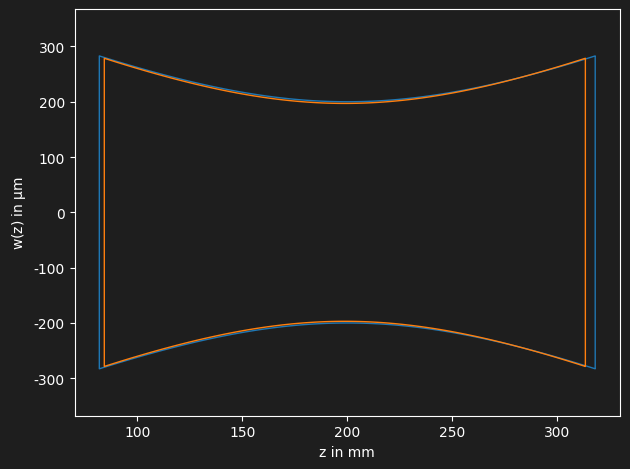

In [2]:
beam = core.Beam.from_gauss(waist=200e-6, focus=0.2, wavelength=1064e-9)
zs = np.linspace(0, 0.4, 20)
rs = beam.radius(zs) + np.random.normal(0, 10e-6, size=zs.shape)
fitted_beam = core.Beam.fit(zs, rs, wavelength=1064e-9)
print(f"Fitted waist: {fitted_beam.waist*1e6:.2f} um, focus: {fitted_beam.focus*1e2:.2f} cm")
beam.plot(beam_kwargs=dict(color="none", edgecolor="C0" ));
fitted_beam.plot(beam_kwargs=dict(color="none", edgecolor="C1" ));

In [ ]:
beam = core.Beam.from_gauss(waist=200e-6, focus=0.0, wavelength=1064e-9)
# setup = core.OpticalSetup(beam, [(0.2, core.thin_lens(focal_length=0.100))])
# setup = core.OpticalSetup(beam, [(0.7, core.thin_lens(focal_length=0.200))])
setup = core.OpticalSetup(beam, [(0.7, core.ThinLens(0.2, 5e-3, 5e-3))])
desired = core.Beam.from_gauss(waist=100e-6, focus=0.8, wavelength=beam.wavelength)
# desired = core.Beam.from_gauss(waist=200e-6, focus=0.8, wavelength=beam.wavelength)
# fig, ax = plt.subplots(figsize=(10, 5))
# setup.plot()
# desired_setup = core.OpticalSetup(desired, [])
# desired_setup.plot(beam_kwargs={"color": "gray"})

lenses = [
    core.ThinLens(50e-3, 10e-3, 10e-3),
    core.ThinLens(100e-3, 10e-3, 10e-3),
    core.ThinLens(200e-3, 10e-3, 10e-3),
    core.ThinLens(300e-3, 10e-3, 10e-3),
]
# setup
# # setup.elements[0][1].matrix

In [4]:
solutions = solver.mode_match(
    setup,
    desired,
    ranges=[solver.ShiftingRange(left=0.1, right=0.25), solver.ShiftingRange(left=0.3, right=0.6)],
    # regions=[solver.Region(left=0.1, right=0.7)],
    selection=lenses,
    # constraints=[solver.Aperture(position=0.325, radius=500e-6), solver.Aperture(position=0.33, radius=500e-6)],
    # constraints=[solver.Passage(left=0.3, right=0.33, radius=500e-6)],
    min_elements=2,
    # max_elements=2,
    max_elements=3,
    random_initial_positions=5,
    filter_pred=1 - 1e-4,
    # optimize_coupling=True,
    # solution_per_population=10
)
print(f"found {len(solutions)} solutions")

found 30 solutions


In [13]:
# solution = solutions[0]
# solution.analysis.summary_df()

In [8]:
# solutions

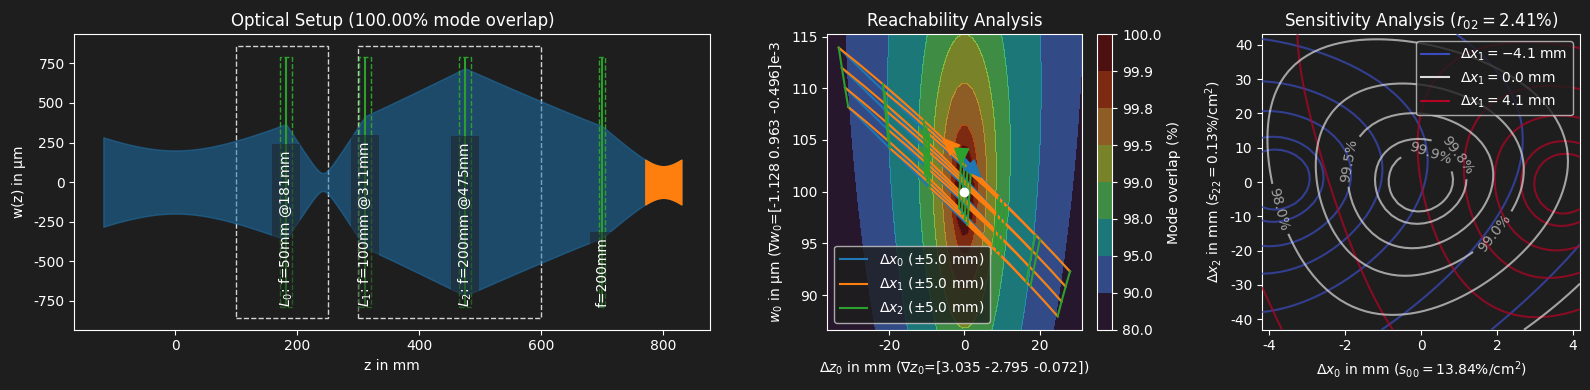

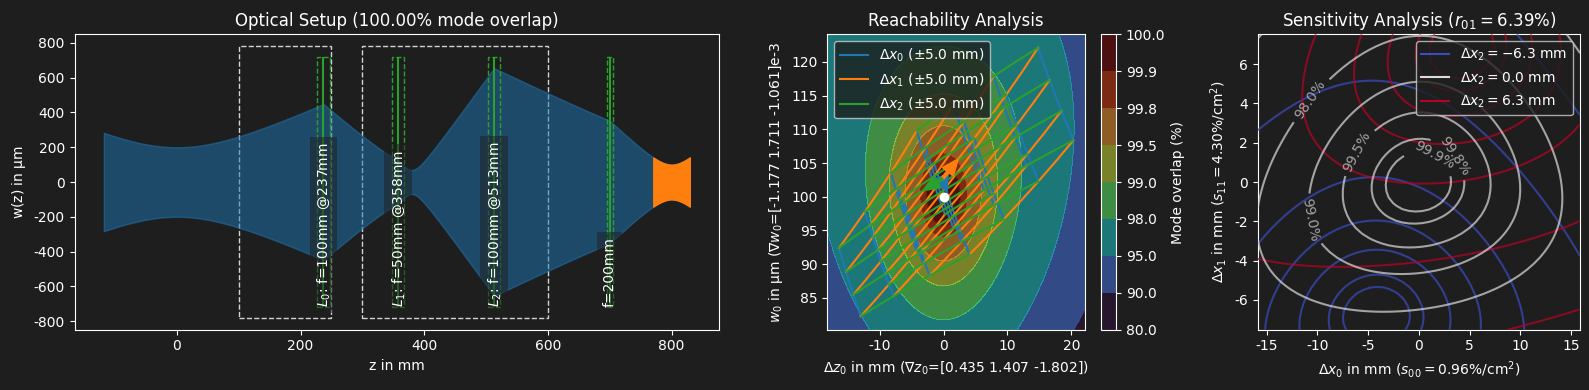

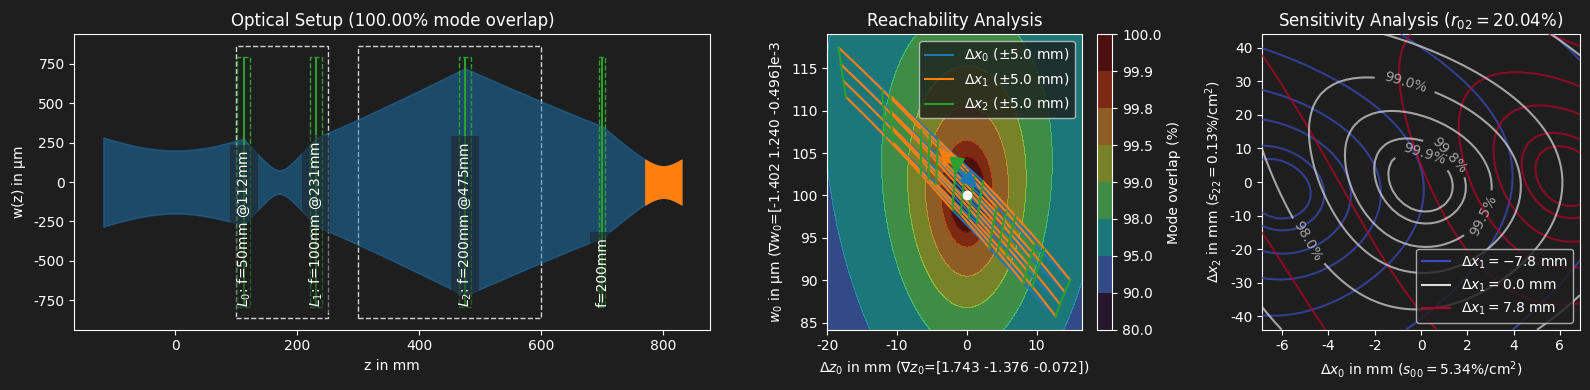

In [5]:
import pandas as pd
# pd.set_option("display.max_colwidth", 20)
subset = solutions.query("num_elements == 3").sort_values("min_coupling")[:3]
subset.df
display(*subset)
# for sol in subset:
#     sol.plot_all()

In [5]:
import numpy as np
pd.DataFrame({"a": [[1], np.array([2.34567876543456])]})

a
0                 [1]
1  [2.34567876543456]

improved coupling from 0.737159 to 0.436405, cross_sens: 4.420e+01  -> 3.919e+01


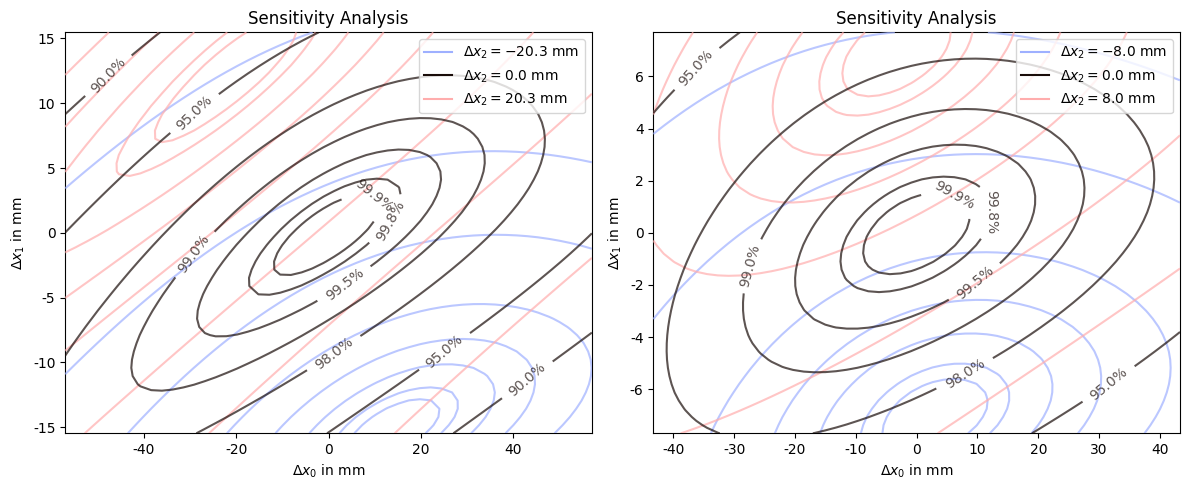

improved coupling from 0.042696 to 0.020129, cross_sens: 5.943e+00  -> 2.689e+00


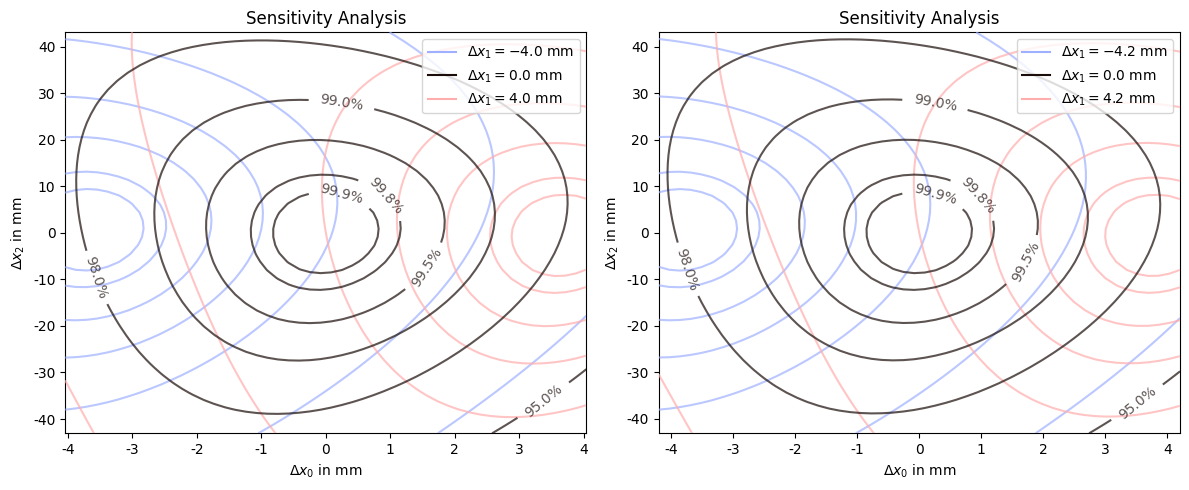

improved coupling from 0.003210 to 0.000001, cross_sens: 6.938e-01  -> 1.715e-04


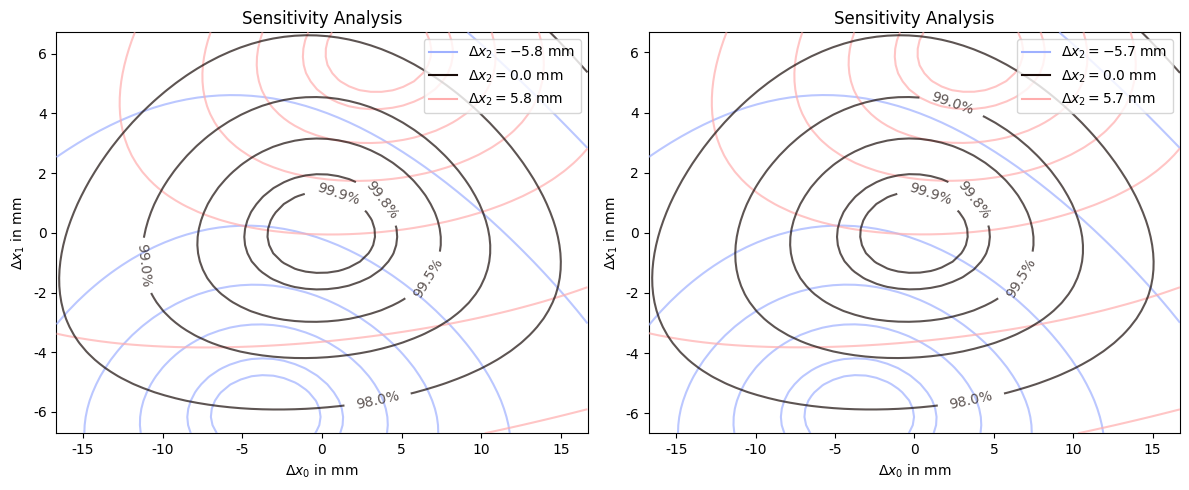

improved coupling from 0.981938 to 0.824137, cross_sens: 1.833e+02  -> 1.866e+02


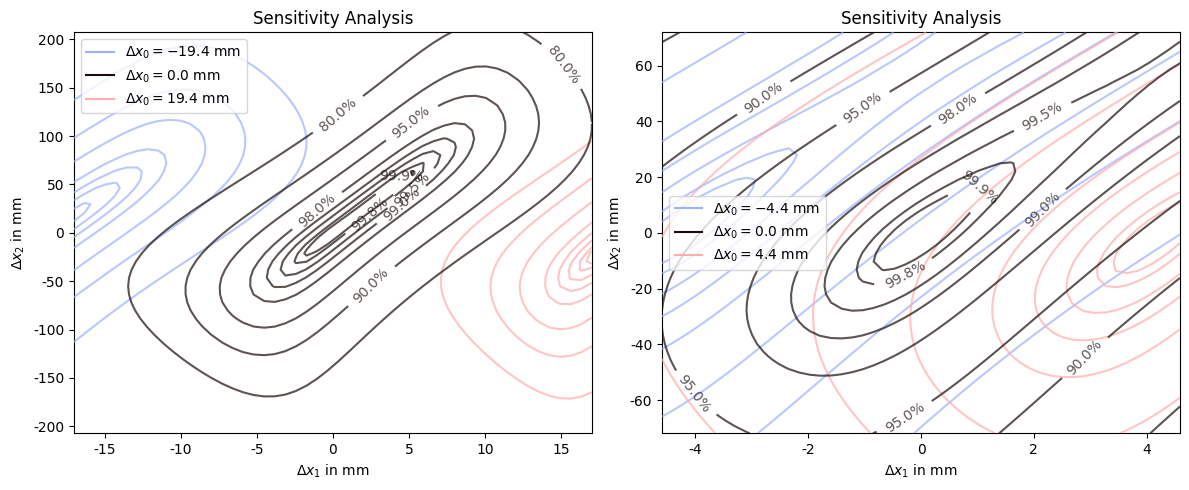

improved coupling from 0.773691 to 0.657856, cross_sens: 4.086e+01  -> 4.463e+01


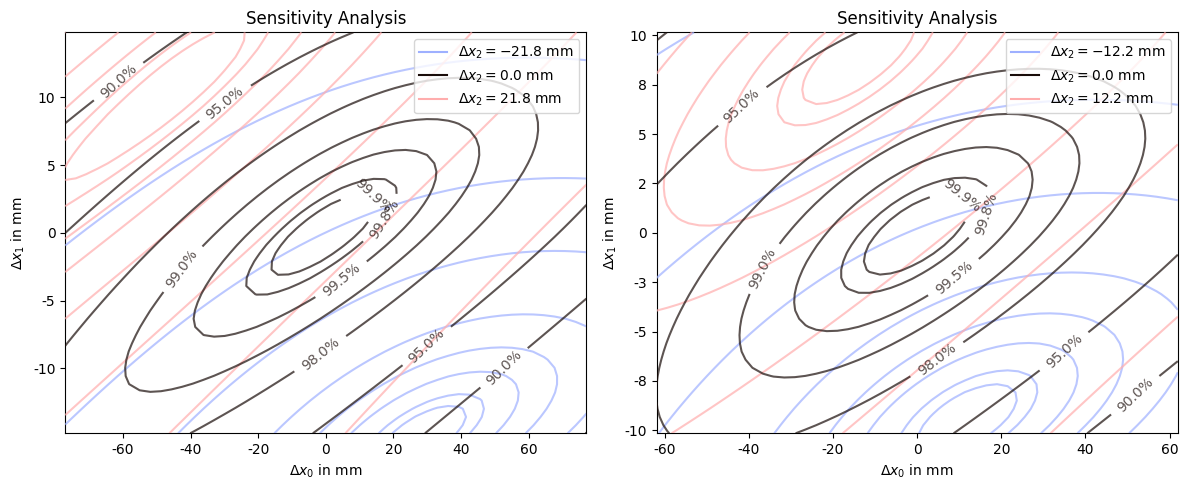

improved coupling from 0.999377 to 0.840979, cross_sens: 2.859e+02  -> 2.266e+02


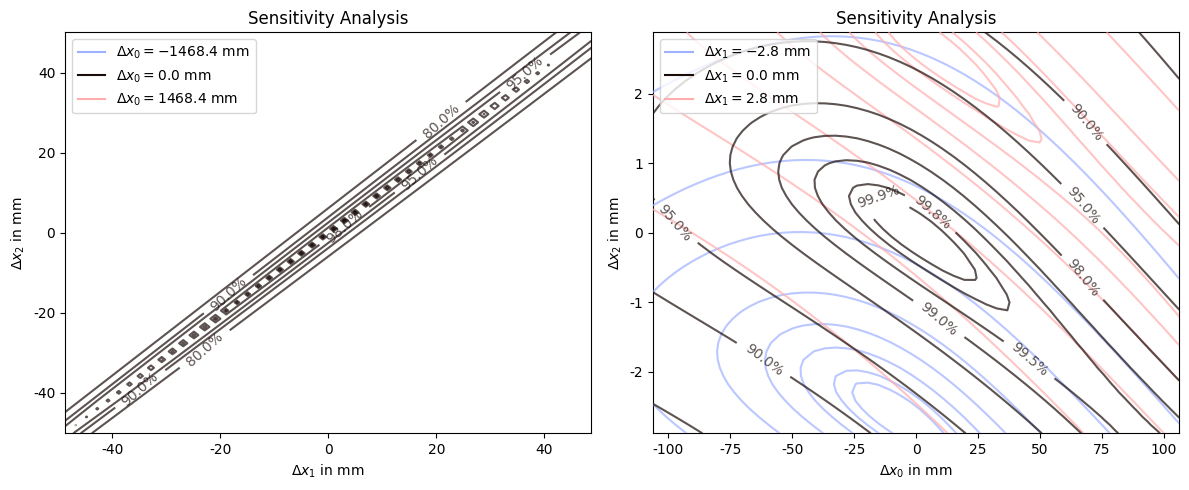

In [41]:
for sol in solutions:
    old_coupling = sol.analysis.min_coupling
    new_res = sol.optimize_coupling()
    if new_res is not None:
        new_coupling = new_res.analysis.min_coupling
        print(f"improved coupling from {old_coupling:.6f} to {new_coupling:.6f}, cross_sens: {sol.analysis.min_cross_sens:.3e}  -> {new_res.analysis.min_cross_sens:.3e}")
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        sol.plot_sensitivity(ax=ax1)
        new_res.plot_sensitivity(ax=ax2)
        display(fig)
        plt.close(fig)

In [19]:
from corset import analyze
from IPython.display import display

for sol in solutions:
    fig, (axl, axr, axc) = plt.subplots(1, 3, figsize=(20, 5), gridspec_kw={"width_ratios": [2, 1, 1]}, tight_layout=True)
    sol.plot_setup(ax=axl)
    sol.plot_reachability(ax=axr)
    # analyze.plot_sensitivity(sol, ax=axc, dimensions=(1, 0), aux_dimension=2, worst_overlap=0.98)
    # analyze.plot_sensitivity(sol, ax=axc, dimensions=(0, 1, 2), worst_overlap=0.98)
    sol.plot_sensitivity(ax=axc)
    # analyze.plot_sensitivity(sol, ax=axc, worst_overlap=0.98, dimensions=(0, 2), force_contours=True)
    # analyze.plot_sensitivity(sol, ax=axc, dimensions=(1,0, 2), worst_overlap=0.98)
    display(sol.analysis.report_df().T[["min_sensitivity_%/cm^2", "max_sensitivity_%/cm^2", "min_coupling"]])
    display(fig)
    plt.close(fig)
    # break
# fig, ax = plt.subplots(figsize=(10, 5)),
# solutions[0].plot();

ImportError: cannot import name 'analyze' from 'corset' (C:\Users\loren\Documents\projects\corset\src\corset\__init__.py)

In [18]:
import pandas as pd

pd.DataFrame([sol.analysis.report() for sol in solutions]).query("elements == 2").sort_values("min_coupling")

overlap  elements  min_sensitivity_axis  min_sensitivity_%/cm^2  \
9       1.0         2                     1               20.919267   
11      1.0         2                     1              216.189042   

    max_sensitivity_axis  max_sensitivity_%/cm^2 min_cross_sens_pair  \
9                      0               22.656470              (0, 1)   
11                     0              216.949955              (0, 1)   

    min_cross_sens_%/cm^2 min_coupling_pair  min_coupling  \
9               21.665486            (0, 1)      0.995174   
11             216.494607            (0, 1)      0.999656   

                                 sensitivities_%/cm^2  \
9   [[22.656470498980145, -21.66548569283399], [-2...   
11  [[216.94995534667015, -216.49460732404543], [-...   

                                            couplings const_space  \
9   [[1.0, -0.9951741191028597], [-0.9951741191009...          []   
11  [[1.0, -0.9996557345704681], [-0.9996557345723...          []   

                                             solution  
9   ModeMatchSolution(candidate=ModeMatchingCandid...  
11  ModeMatchSolution(candidate=ModeMatchingCandid...

In [28]:
def flatten_with_step(arr: np.ndarray, steps: list[int]) -> np.ndarray:
    indices = tupleslice(None, None, step) for step in steps]
    return arr[tuple(indices)].reshape(-1, arr.shape[-1])

SyntaxError: unmatched ']' (3890836629.py, line 2)

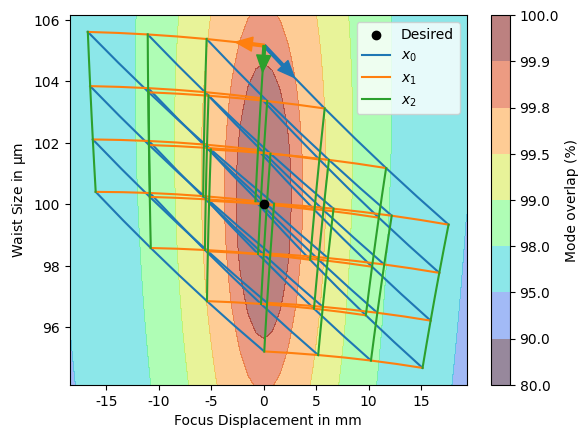

In [76]:
from corset import analyze
analyze.analyze_reachability(solutions[2], displacement=5e-3)

In [37]:
@np.vectorize(signature='(n)->(2)')
def func(xs):
    x, y = xs
    return np.array([x*y, x+y])

res = np.moveaxis(np.meshgrid([1,2,3], [10,20,30,40], indexing='ij'), 0, -1)

p, s = np.moveaxis(func(res), -1, 0)
p
# p
# func(res)

array([[ 10,  20,  30,  40],
       [ 20,  40,  60,  80],
       [ 30,  60,  90, 120]])

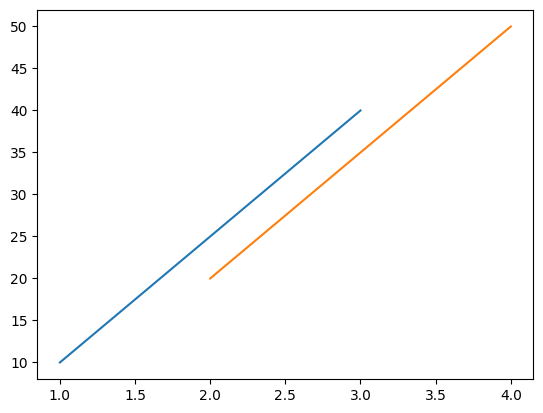

In [42]:
plt.plot([[1,2], [3,4]], [[10,20], [40,50]])

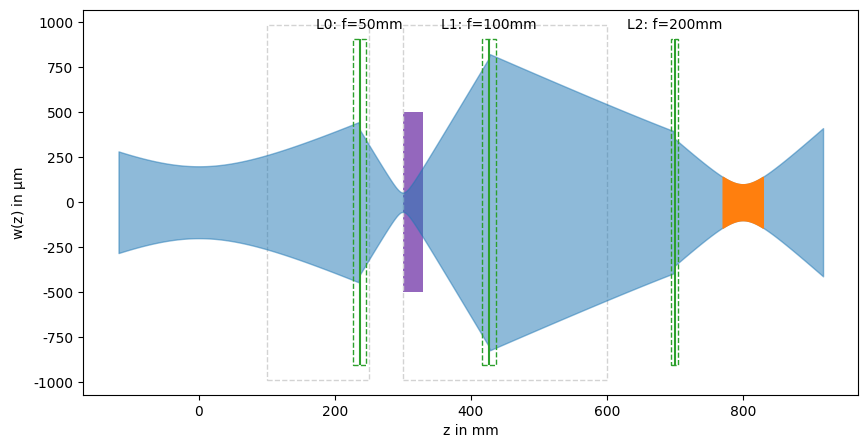

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
solutions[0].plot_setup();

In [ ]:
# constraints=[solver.Aperture(position=0.325, radius=500e-6), solver.Aperture(position=0.33, radius=500e-6)],
constraints=[solver.Passage(left=3.25, right=0.33, radius=500e-6)]
aperture_constraints = [aperture for constraint in constraints for aperture in constraint.apertures()]
# aperture_constraints
# np.transpose([(c.position, c.radius) for c in constraints])

[Aperture(position=3.25, radius=0.0005),
 Aperture(position=0.33, radius=0.0005)]

In [8]:
solutions

[ModeMatchSolution(base_setup=OpticalSetup(initial_beam=Beam(ray=array([0.        , 0.00169341]), z_offset=0.0, wavelength=1.064e-06), elements=[(0.7, array([[ 1.,  0.],
        [-5.,  1.]]))]), desired_beam=Beam(ray=array([0.        , 0.00338682]), z_offset=0.8, wavelength=1.064e-06), overlap=np.float64(0.9999999999798236), parametrized_setup=ParametrizedSetup(initial_beam=Beam(ray=array([0.        , 0.00169341]), z_offset=0.0, wavelength=1.064e-06), elements=[(None, array([[  1.,   0.],
        [-10.,   1.]])), (None, array([[  1.,   0.],
        [-20.,   1.]])), (None, array([[  1.,   0.],
        [-10.,   1.]])), (0.7, array([[ 1.,  0.],
        [-5.,  1.]]))]), positions=array([0.2297681 , 0.34320952, 0.50511786]), regions=[Region(left=0.1, right=0.25, min_elements=0, max_elements=inf, selection=[]), Region(left=0.3, right=0.6, min_elements=0, max_elements=inf, selection=[])], region_populations=[(Lens(focal_length=0.1, left_margin=0.01, right_margin=0.01),), (Lens(focal_length=0.

In [13]:
import sympy as sp

mapping = {
    np.multiply: sp.Mul,
    np.add: sp.Add,
    np.subtract: lambda a, b: sp.Add(a, sp.Mul(-1, b)),
    np.divide: lambda a, b: sp.Mul(a, sp.Pow(b, -1)),
    np.matmul: lambda a, b: sp.MatMul(a, b),
    np.sqrt: sp.sqrt,
}

def expr__array_ufunc__(expr: sp.core.Expr, func, method, *inputs, **kwargs) -> sp.core.Expr:
    if func in mapping:
        return mapping[func](*inputs, **kwargs)
    return NotImplemented

sp.core.expr.Expr.__array_ufunc__ = expr__array_ufunc__

In [9]:
x1, x2 = sp.symbols('x1 x2')
type(np.array([[1, 2], [3, 4]]) @ sp.Matrix([x1, x2]))

NameError: name 'sp' is not defined

In [93]:
positions = sp.symbols([f'x{i}' for i in range(len(sol.positions))])
expr = sp.Matrix(sol.parametrized_setup.substitute(positions).rays[-1])
res = expr.expand()
# res = expr.simplify()

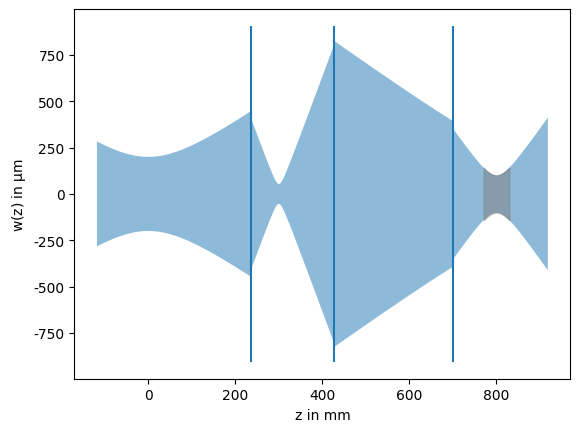

In [17]:


for sol in solutions:
    fig, ax = plt.subplots()
    sol.setup.plot(ax)
    desired_setup.plot(ax, beam_kwargs={"color": "gray", "alpha": 0.5})

In [97]:
res

Matrix([
[0.338681718899553*x0**2*x1 - 0.203209031339732*x0**2 - 0.338681718899553*x0*x1**2 + 0.237077203229687*x0*x1 - 0.0237077203229687*x0 + 0.0169340859449777*x1**2 - 0.0118538601614844*x1 + 0.00118538601614844],
[ -1.69340859449777*x0**2*x1 + 0.677363437799107*x0**2 + 1.69340859449777*x0*x1**2 - 0.846704297248883*x0*x1 + 0.0846704297248883*x0 - 0.0846704297248883*x1**2 + 0.0423352148624442*x1 - 0.00423352148624442]])

In [120]:
from numba import njit

lambdified = sp.lambdify(positions, res, modules=["numpy"])
# lambdified = njit(sp.lambdify(positions, expr, modules=["numpy"]))

def func2():
    return core.Beam(lambdified(*sol.positions), 0, sol.desired_beam.wavelength)

timeit.timeit(func2, number=1000)

0.003972999984398484

In [105]:
lambdified(1,2)

array([[-0.38491177],
       [ 2.19719765]])

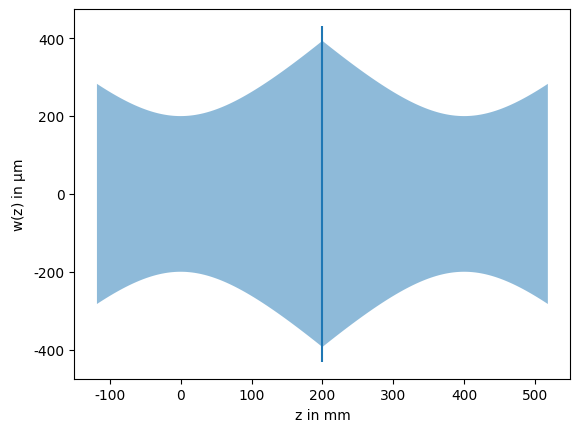

In [25]:
setup.plot(plt.gca())

In [39]:
import itertools
list(itertools.combinations_with_replacement([1,2,3], 1))

[(1,), (2,), (3,)]

In [42]:
float("inf") == float("inf")

True

In [ ]:
from corset import solver


list(solver.lens_combinations(
    [solver.ShiftingRange(0, 0, min_elements=1, max_elements=2), solver.ShiftingRange(0, 0, min_elements=0, max_elements=1)],
    min_elements=2,
    max_elements=3,
    base_selection=["A", "B"],
))

[[('A',), ('A',)],
 [('A',), ('B',)],
 [('B',), ('A',)],
 [('B',), ('B',)],
 [('A', 'A'), ()],
 [('A', 'A'), ('A',)],
 [('A', 'A'), ('B',)],
 [('A', 'B'), ()],
 [('A', 'B'), ('A',)],
 [('A', 'B'), ('B',)],
 [('B', 'B'), ()],
 [('B', 'B'), ('A',)],
 [('B', 'B'), ('B',)]]

In [26]:
core.Beam.from_gauss(waist=200e-6, z_offset=0.0, wavelength=1064e-9).rayleigh_range

np.float64(0.11810498697705987)

In [3]:
np.searchsorted([1,2],3)

np.int64(2)

In [6]:
indices = np.array([0,0,1,1,1,2])
segments = np.split(indices, np.nonzero(np.diff(indices))[0]+1)
segments

[array([0, 0]), array([1, 1, 1]), array([2])]

In [7]:
np.nonzero(np.diff(indices))[0]+1

array([2, 5])

In [4]:
np.split([0,1,2,3,4,5],[2,4])

[array([0, 1]), array([2, 3]), array([4, 5])]

In [3]:
from scipy import optimize
import numpy as np

In [ ]:
import matplotlib.typing
import matplotlib as mpl

In [10]:
def fun(x):
    a, b  = x
    return -a*b
constraint = optimize.NonlinearConstraint(lambda x: sum(x), -np.inf, 8/2)

res = optimize.minimize(fun, [2, 5], constraints=[constraint], bounds=[(0, None), (0, None)])
res

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -4.000000000000043
           x: [ 2.000e+00  2.000e+00]
         nit: 2
         jac: [-2.000e+00 -2.000e+00]
        nfev: 6
        njev: 2
 multipliers: [ 2.000e+00]

In [14]:
A = np.array([[-138.21066599,   83.95011389,   -7.43674547],
               [  83.95011388, -850.28325756,  858.48747681],
               [  -7.4367455,   858.48747681, -912.78749769]]) / 2

A_inv = np.linalg.inv(A)
A_inv@A

array([[ 1.00000000e+00, -2.69920392e-11,  1.87013660e-11],
       [ 7.87996825e-12,  1.00000000e+00,  5.49959911e-11],
       [ 5.21644891e-12, -1.89032276e-11,  1.00000000e+00]])

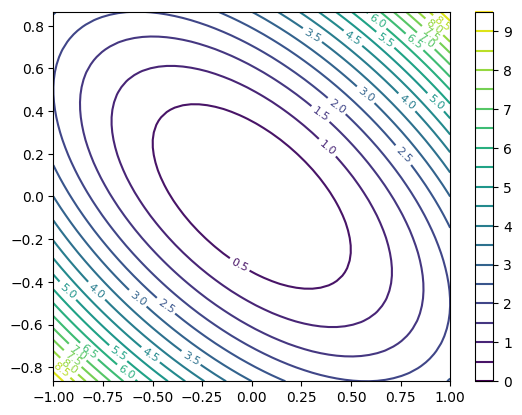

In [21]:
A = np.array([[3, 2], [2, 4]])
# A = (A+A.T)/2

@np.vectorize(signature='(n)->()')
def func(x):
    return float(x.T @ A @ x)

c = 2

A_inv = np.linalg.pinv(A)

x_range = np.sqrt(A_inv[0,0] * c)
y_range = np.sqrt(A_inv[1,1] * c)

# ls = np.linspace(-1, 1, 100)
xs, ys = np.meshgrid(np.linspace(-x_range, x_range, 50), np.linspace(-y_range, y_range, 50))
zs = func(np.stack([xs, ys], axis=-1))

res = plt.contour(xs, ys, zs, levels=np.arange(0, 10, 0.5))
plt.clabel(res, inline=True, fontsize=8)
plt.colorbar()

In [ ]:
display

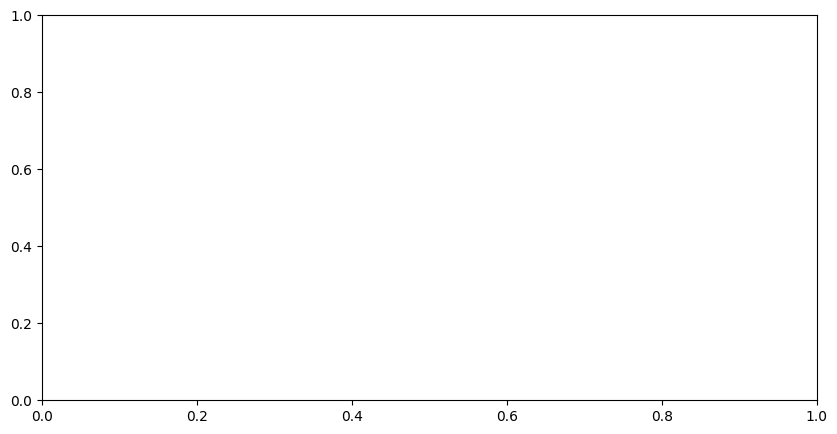

NoneType

In [33]:
plt.ioff()
fig, ax = plt.subplots(figsize=(10, 5))
res = display(fig)
type(res)


In [50]:
import pandas as pd
from dataclasses import dataclass

@dataclass
class C:
    df: pd.DataFrame

    def query(self, expr: str) -> pd.DataFrame:
        return self.df.query(expr, level=1)


df = pd.DataFrame({
    "a": [1,2,3,4],
    "b": [5,6,7,8],
})
# df.query("a > 2")
c = C(df)
x = 2
c.query("a > @x")

a  b
2  3  7
3  4  8

(np.float64(0.0), np.float64(1.0))

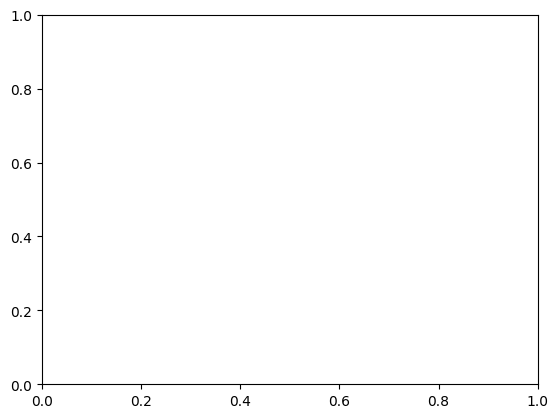

In [2]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.get_xlim()